In [16]:
import numpy as np
import healpy as hp
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u
from pixell import enmap, reproject

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# from astropy.visualization import wcsaxes
from astropy.wcs import WCS

def plot_car_smallfield(healpy_filepath, ra_deg, dec_deg, reso_perpixel, xsize_deg, ysize_deg):
    """
    Converts a full sky healpy map to CAR projection and plots it.
    Arguments:
    healpy_map = path to full healpy map
    ra_deg = RA in degrees
    dec_deg = DEC in degrees
    reso_perpixel = resolution per pixel in arcmin
    map_size = Size of a side for a square map in degrees
    """

    inmap = hp.read_map(healpy_filepath, field=[0])
    inmap = inmap.astype(np.float64)
    
    # Target coordinates for target field
    # size_deg = map_size  # Size of the cutout in degrees
    reso_arcmin = reso_perpixel  # Resolution in arcminutes
    
    pixels_perdeg = 60.0/reso_arcmin # 60arcmin / (arcmin per pixel)
    
    # Define the WCS for the cutout
    wcs = WCS(naxis=2)
    wcs.wcs.ctype = ['RA---CAR', 'DEC--CAR']
    wcs.wcs.crval = [ra_deg, dec_deg]  # Center of the cutout
    # wcs.wcs.crpix = [xsize_deg * pixels_perdeg / 2, ysize_deg * pixels_perdeg / 2]  # Center pixel
    wcs.wcs.cdelt = [-reso_arcmin / 60, reso_arcmin / 60]  # Pixel scale in degrees
    wcs.wcs.crpix = [75, 60]
    
    # Define the shape of the output map
    shape = (int(xsize_deg * pixels_perdeg), int(ysize_deg * pixels_perdeg))
    print(f"(Pix per deg: {pixels_perdeg}")
    
    # Create a CAR map of the desired cutout
    cutout_map = enmap.zeros(shape, wcs=wcs)
    print(cutout_map.shape)
    print(cutout_map.wcs)

    car_cutoutmap = reproject.healpix2map(inmap, cutout_map.shape, cutout_map.wcs, rot=None, spin=[0, 2], 
                                    method='harm', order=1, extensive=False, verbose=True)

    
    # Define the figure and axis with WCS projection
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection=wcs)


    # colombi1_cmap = ListedColormap(np.loadtxt("Planck_Parchment_RGB.txt")/255.)
    # colombi1_cmap.set_bad("gray") # color of missing pixels
    # cmap = colombi1_cmap
    # cmap='plasma'
    cmap = plt.get_cmap('Spectral')
    # Plot the CAR map
    im = ax.pcolormesh(car_cutoutmap, cmap=cmap, vmin=0, vmax=5e-3)
    # im = ax.pcolormesh(car_cutoutmap, cmap=cmap, vmin=-3e-4, vmax=3e-4)
    
    # Format the tick labels to decimal degrees
    ax.coords[0].set_format_unit('deg')
    ax.coords[1].set_format_unit('deg')
    ax.coords[0].display_minor_ticks(True)
    ax.coords[1].display_minor_ticks(True)
    ax.grid(color='gray', ls='solid')
    
    # Add colorbar
    # cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', fraction=0.045, pad=0.1, aspect=20)
    # cbar.set_label('Map Value')
    
    
    ax.set_title('OrionA Input signal')
    ax.set_xlabel('Right Ascension (degrees)')
    ax.set_ylabel('Declination (degrees)')
    
    plt.show()

(Pix per deg: 30.0
(150, 150)
car:{cdelt:[-0.03333,0.03333],crval:[84.5,-6.98],crpix:[75.00,60.00]}


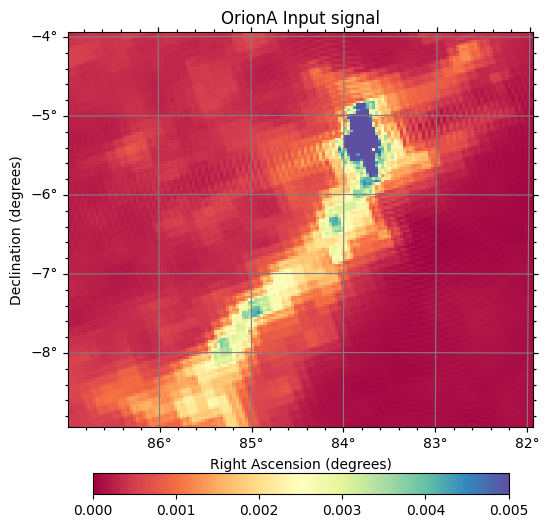

In [17]:
hp_fpath = "./input_files/pysm3_map_nside2048_allStokes.fits"
# Target coordinates for Orion A
ra_deg, dec_deg = 84.5, -6.98  # in degrees
reso_arcmin = 2  # Resolution in arcminutes
xsize_deg = 5.0  # Size of the cutout in degrees
ysize_deg = 5.0


plot_car_smallfield(hp_fpath,ra_deg, dec_deg, reso_arcmin, xsize_deg, ysize_deg)